In [1]:
#project using two algorithms decision tree and KNN
#3 visualization tools matplot lib ,seaborn and plotly
#step 1 import the data 2.numerical analysis 3.visualization 4.data preprocessing 
#of splitting the data into x train and y train 
#standard scaler in knn why not decision tree
# atlast plot which is the best algo knn or decision tree

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import plotly.express as px # plotly express is wrapper of plotly 
 # it has simple syntax to visualize the data
import plotly.offline as pyo # plotly has its own dashboard so we use offline one here 
from plotly.offline import init_notebook_mode,plot,iplot
import cufflinks as cf #used to bind pandas as plotly together
from sklearn.metrics import accuracy_score


In [33]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()



In [34]:
df=pd.read_csv(r'D:\heart.csv')

In [35]:
df  #1 means yes 0 means no


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [36]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]



for i in range(len(info)):
    print(df.columns[i]+":\t\t\t"+info[i])

age:			age
sex:			1: male, 0: female
cp:			chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:			resting blood pressure
chol:			 serum cholestoral in mg/dl
fbs:			fasting blood sugar > 120 mg/dl
restecg:			resting electrocardiographic results (values 0,1,2)
thalach:			 maximum heart rate achieved
exang:			exercise induced angina
oldpeak:			oldpeak = ST depression induced by exercise relative to rest
slope:			the slope of the peak exercise ST segment
ca:			number of major vessels (0-3) colored by flourosopy
thal:			thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [37]:
df['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [38]:
df.groupby('target').size() #0 means no 1 means yes


target
0    138
1    165
dtype: int64

In [39]:
df.shape

(303, 14)

In [40]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [41]:
df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


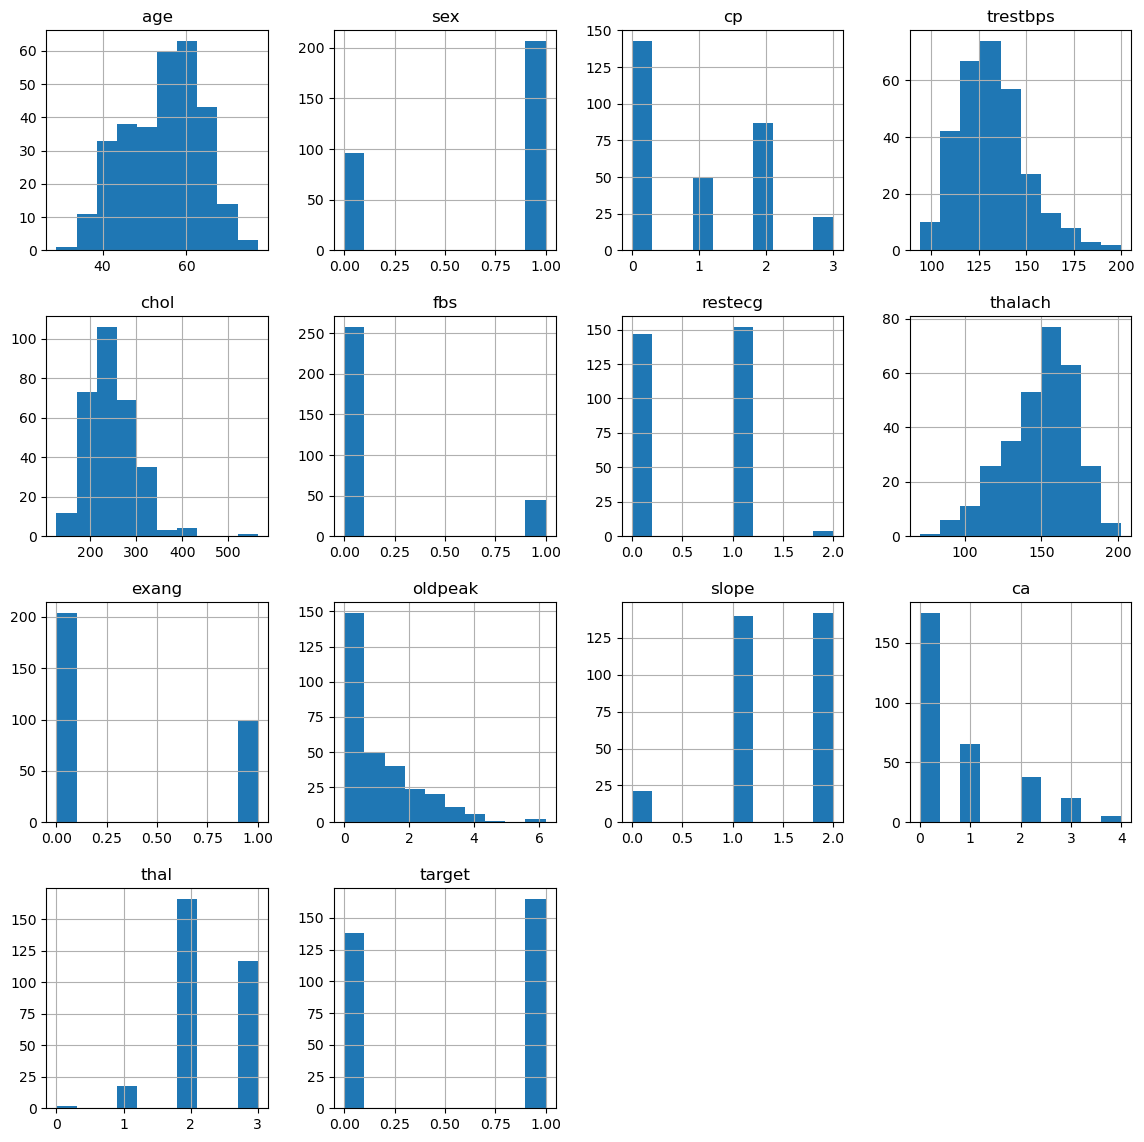

In [42]:
df.hist(figsize=(14,14))
plt.show()

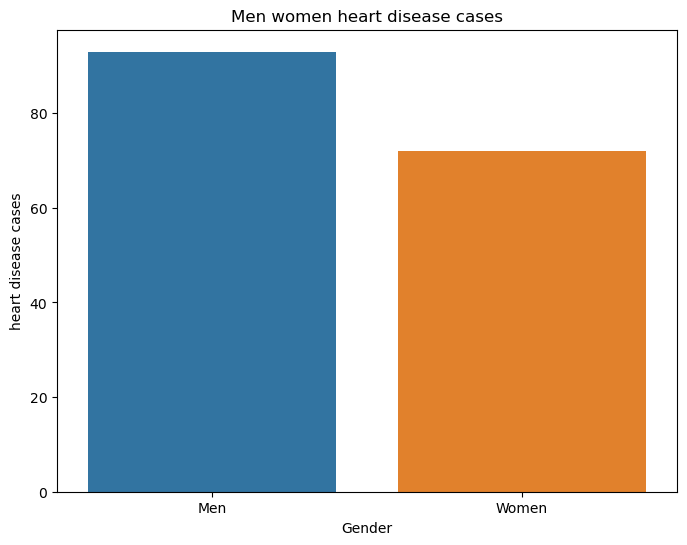

In [43]:
menwithheartdisease=df[(df['sex']==1) & df['target']==1]
womenwithheartdisease=df[(df['sex']==0) & df['target']==1]
men_count=len(menwithheartdisease)
women_count=len(womenwithheartdisease)
plt.figure(figsize=(8,6))
sns.barplot(x=['Men','Women'],y=[men_count,women_count])
plt.xlabel('Gender')
plt.ylabel('heart disease cases')
plt.title('Men women heart disease cases')
plt.show()



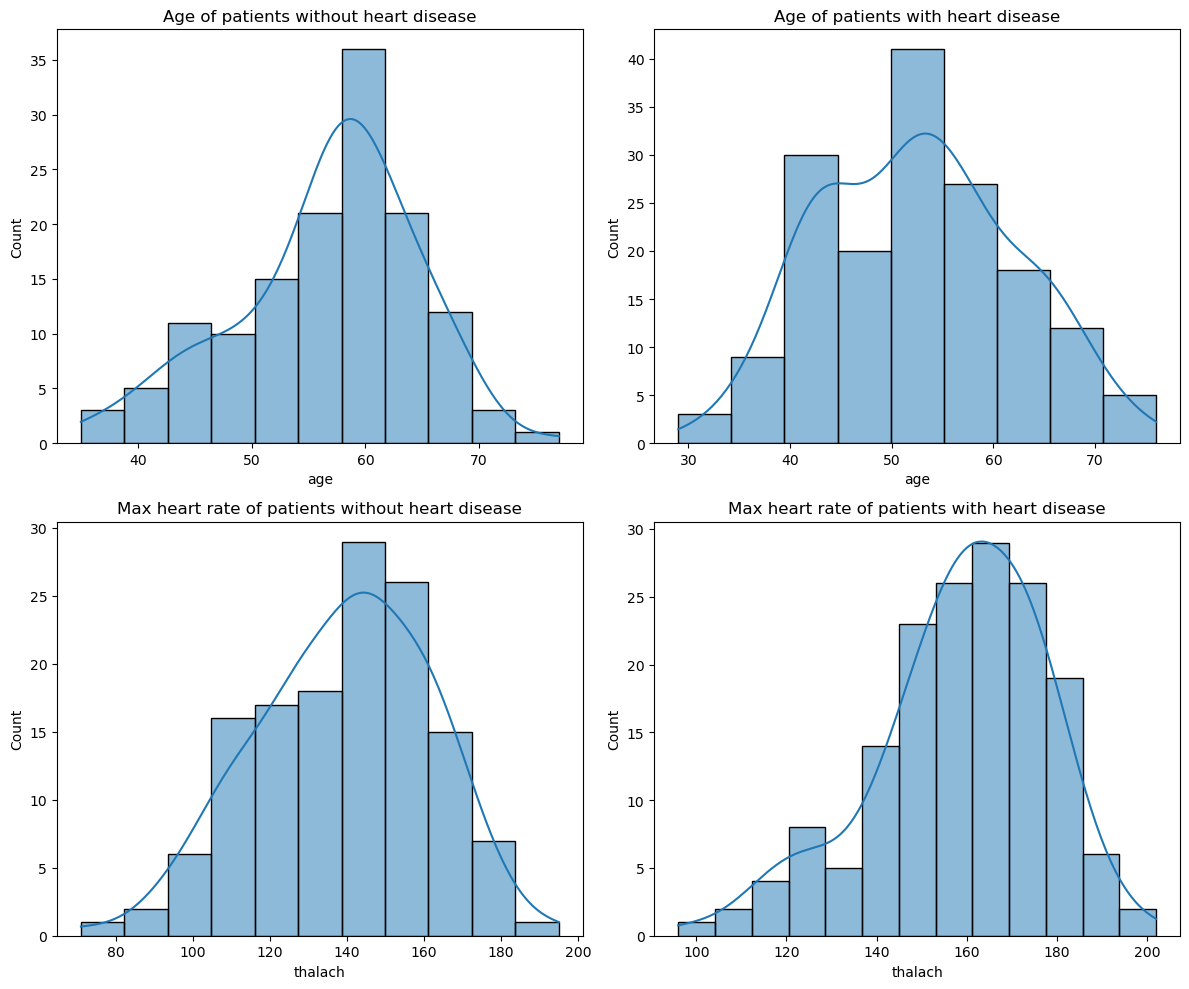

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# First subplot
plt.subplot(221)
sns.histplot(df[df['target'] == 0]['age'], kde=True)
plt.title("Age of patients without heart disease")

# Second subplot
plt.subplot(222)
sns.histplot(df[df['target'] == 1]['age'], kde=True)
plt.title("Age of patients with heart disease")

# Third subplot
plt.subplot(223)
sns.histplot(df[df['target'] == 0]['thalach'], kde=True)
plt.title("Max heart rate of patients without heart disease")

# Fourth subplot
plt.subplot(224)
sns.histplot(df[df['target'] == 1]['thalach'], kde=True)
plt.title("Max heart rate of patients with heart disease")

# Adjust layout
plt.tight_layout()
plt.show()


In [45]:
# now preprocessing means preprocess the data .store in x and y and store in xtrain and ytrain 

# we usually do label encoding(search in google) means preprocessing to convert categorical data
#into numerical data
#here no need for label encoding because we have only 1 and 0 in target
# we use standard scaler in knn to scale down all the values for better predictions


In [46]:
x,y=df.loc[:,:'thal'],df['target']

In [47]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [48]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [49]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y,random_state=5,shuffle=True)



In [50]:
# xtest=xtest.drop(columns=['slope'])
# xtrain=xtrain.drop(columns=['slope'])

In [51]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(xtrain,ytrain)


DecisionTreeClassifier()

In [52]:
xtrain

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2
131,49,0,1,134,271,0,1,162,0,0.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2
189,41,1,0,110,172,0,0,158,0,0.0,2,0,3


In [53]:
xtest

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2
213,61,0,0,145,307,0,0,146,1,1.0,1,0,3
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2
233,64,1,0,120,246,0,0,96,1,2.2,0,1,2
166,67,1,0,120,229,0,0,129,1,2.6,1,2,3


In [54]:
prediction=dt.predict(xtest)


In [55]:
prediction

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1], dtype=int64)

In [56]:
accuracydt=accuracy_score(ytest,prediction)*100
accuracydt

77.63157894736842

In [57]:
dt.feature_importances_

array([0.05879801, 0.03909859, 0.08918751, 0.02748626, 0.07050437,
       0.00744751, 0.01876772, 0.15401484, 0.01474606, 0.18546888,
       0.00893701, 0.22061575, 0.1049275 ])

In [61]:
feature_importances = dt.feature_importances_

In [62]:
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importances
})

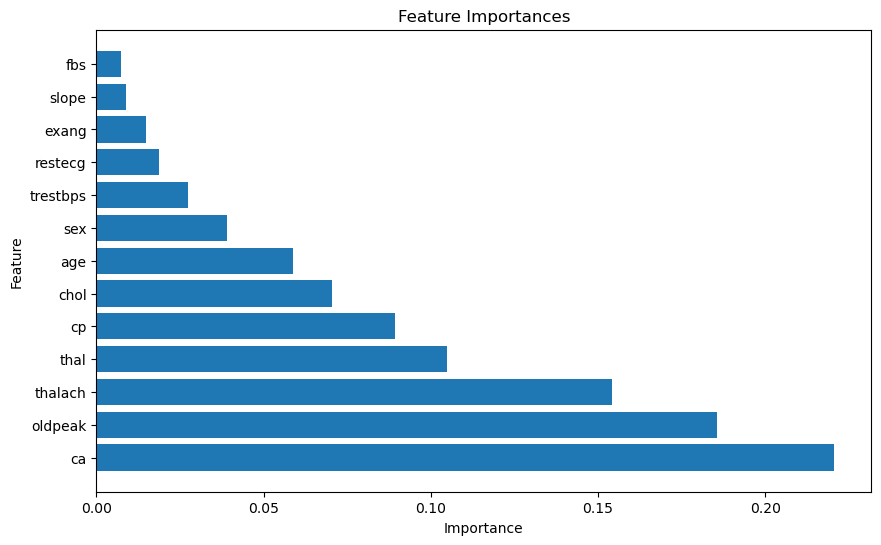

In [65]:
# Create a bar plot of feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.show()
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [66]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [67]:
category=["no heart disease","yes heart disease"]


In [68]:
#giving custom data manually to see if it predicts correctly 
#give all the values in numpy array except target target should be printed
custom_data=np.array([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])
predicted_custom_data=dt.predict(custom_data)
print(category[int(predicted_custom_data)])


yes heart disease


C:\Users\91798\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning:

X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names



In [69]:
#knn 
#nearest data point 

In [74]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler().fit(x)
xstd=std.transform(x)


In [75]:
from sklearn.model_selection import train_test_split
xtrainstd,xteststd,ytrain,ytest= train_test_split(xstd,y,random_state=5,shuffle=True)



In [76]:

from sklearn.metrics import accuracy_score

knn=KNeighborsClassifier(n_neighbors=9)
knn.fit(xtrainstd,ytrain)

KNeighborsClassifier(n_neighbors=9)

In [77]:
knn_prediction=knn.predict(xteststd)


In [78]:
accuracy_knn=accuracy_score(ytest,knn_prediction)*100
accuracy_knn

92.10526315789474

In [79]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [80]:
xstd

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [81]:
scores={}
scores_list=[]
k_range=range(1,26)
for k in range(1,26):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(xtrainstd,ytrain)
    knn_prediction=knn.predict(xteststd)
    scores[k]=accuracy_score(ytest,knn_prediction)
    scores_list.append(scores[k])

In [82]:
scores_list

[0.7631578947368421,
 0.8157894736842105,
 0.8289473684210527,
 0.8552631578947368,
 0.8947368421052632,
 0.8947368421052632,
 0.9078947368421053,
 0.9078947368421053,
 0.9210526315789473,
 0.8947368421052632,
 0.881578947368421,
 0.9078947368421053,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.9078947368421053,
 0.881578947368421,
 0.8947368421052632,
 0.881578947368421,
 0.868421052631579,
 0.868421052631579,
 0.868421052631579,
 0.8947368421052632,
 0.868421052631579,
 0.8947368421052632]

In [83]:
px.line(x=k_range,y=scores_list)


<BarContainer object of 2 artists>

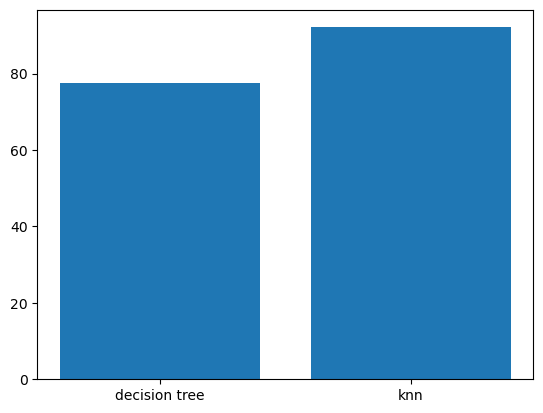

In [84]:
#which is best decision tree or knn ploting 
algorithms=['decision tree','knn']
scores1=[accuracydt,accuracy_knn]
plt.bar(algorithms,scores1)